In [2]:
import pandas as pd
import numpy as np

In [3]:
# Read the data into a dataframe
## Only relevant attributes red
d = pd.read_csv('D:/B3_Lokal-Datensatzpaket/CSV/MiD2017_Lokal_Personen.csv', sep=';', usecols = ['H_ID_Lok', 'P_ID', 'P_GEW', 'P_HOCH', 'vpedrad', 'HP_SEX', 'alter_gr', 'taet', 'P_BIL', 'hhgr_gr2', 'oek_status', 'GITTER_500m', 'GITTER_1km', 'GITTER_5km', 'PRAEZISION'])

#display(d)

In [4]:
#show how missing entries for bicycle availability is spread across age groups
d_temp= d[d.vpedrad == 200]
print(d_temp['alter_gr'].value_counts(normalize=True))


1     0.412885
5     0.131987
2     0.107388
6     0.103898
4     0.090330
7     0.066158
3     0.058654
8     0.024757
99    0.003941
Name: alter_gr, dtype: float64


In [5]:
#throw out missing pedelec availability responses; 9= "no response", 200 = "not surveyed" (mostly kids)
#throws out ~26%
d = d[d.vpedrad != 9]
d = d[d.vpedrad != 200]

#throw out other missing values
#throws out another ~1.5%
d = d[d.HP_SEX != 9]
d = d[d.alter_gr != 99]
d = d[d.taet != 9]
d = d[d.P_BIL != 9]
d = d[d.PRAEZISION != 9]

#throw out people whose location is not known at least to the 1km-grid cell level
#throws out another ~25%
d = d.loc[d['GITTER_1km'].str.contains("1km", case=False)]

In [6]:
# Use the map function to populate the elevar column in gridcells1km

#get elevar values for the residential location 
elevar_df = pd.read_csv('C:/Users/arning/sciebo/04_Research/02_Current projects/2023_04_PLUG-IN/10_Ownership/Python/elevar.csv')
elevar_df = elevar_df.set_index('cellname')

# Add a new column 'elevar' in dataframe 'd'
d['elevar'] = 99

# Use the map function to populate the elevar column in gridcells1km
d['elevar'] = d['GITTER_1km'].map(elevar_df['elevar'])

#throw out elevar=NaN entries (=non NRW households; reduces dataset to rougly one sixth!)
d = d.dropna(subset=['elevar'])
d

,H_ID_Lok,P_ID,P_GEW,P_HOCH,vpedrad,HP_SEX,alter_gr,taet,P_BIL,hhgr_gr2,oek_status,GITTER_500m,GITTER_1km,GITTER_5km,PRAEZISION,elevar
8,10002550,1,",781016122726076","202,871194932508",1,1,2,2,5,1,3,500mN30810E40450,1kmN3081E4045,5kmN3080E4045,1,0.026270
16,10003680,1,",186112318433314","48,3432125580693",3,1,8,4,5,2,3,500mN30690E41195,1kmN3069E4119,5kmN3065E4115,1,0.017991
28,10005060,1,",0995876487234696","25,8681795537466",1,2,5,1,4,2,4,,1kmN3084E4111,5kmN3080E4110,1,0.007031
29,10005060,2,",147471578855225","38,3061687849895",1,1,6,4,3,2,4,,1kmN3084E4111,5kmN3080E4110,1,0.007031
36,10007010,1,",245834573624995","63,8562409351415",1,2,5,1,3,3,3,500mN30620E41125,1kmN3062E4112,5kmN3060E4110,1,0.012211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316307,99984820,1,",909739798542854","236,307541723794",2,1,7,4,2,2,3,500mN31210E42025,1kmN3121E4202,5kmN3120E4200,1,0.050316
316308,99984820,2,",589583568286475","153,146035696884",2,2,6,5,3,2,3,500mN31210E42025,1kmN3121E4202,5kmN3120E4200,1,0.050316
316322,99991670,1,",132814859249385","34,4990435109951",1,2,5,1,3,3,3,500mN30820E41015,1kmN3082E4101,5kmN3080E4100,3,0.020933
316323,99991670,2,",262320000067251","68,1383780946653",1,1,6,1,2,3,3,500mN30820E41015,1kmN3082E4101,5kmN3080E4100,3,0.020933


In [7]:
# Use the map function to populate the Raumtyp column in gridcells1km

#get raumtyp values for the residential location 
Raumtyp_df = pd.read_csv('C:/Users/arning/sciebo/04_Research/02_Current projects/2023_04_PLUG-IN/10_Ownership/Python/Raumtyp.csv')
Raumtyp_df = Raumtyp_df.set_index('cellname')

# Add a new column 'Raumtyp' in dataframe 'd'
d['Raumtyp'] = 99

# Use the map function to populate the Raumtyp column in gridcells1km
d['Raumtyp'] = d['GITTER_1km'].map(Raumtyp_df['Raumtyp'])

#throw out Raumtyp=NaN entries (=non NRW households; reduces dataset to rougly one sixth!)
d = d.dropna(subset=['Raumtyp'])

#make Raumtyp into int
d[['Raumtyp']] = d[['Raumtyp']].astype(int)
d

C:\Users\arning\AppData\Local\Temp\ipykernel_18772\324530930.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d[['Raumtyp']] = d[['Raumtyp']].astype(int)


,H_ID_Lok,P_ID,P_GEW,P_HOCH,vpedrad,HP_SEX,alter_gr,taet,P_BIL,hhgr_gr2,oek_status,GITTER_500m,GITTER_1km,GITTER_5km,PRAEZISION,elevar,Raumtyp
8,10002550,1,",781016122726076","202,871194932508",1,1,2,2,5,1,3,500mN30810E40450,1kmN3081E4045,5kmN3080E4045,1,0.026270,12
16,10003680,1,",186112318433314","48,3432125580693",3,1,8,4,5,2,3,500mN30690E41195,1kmN3069E4119,5kmN3065E4115,1,0.017991,11
28,10005060,1,",0995876487234696","25,8681795537466",1,2,5,1,4,2,4,,1kmN3084E4111,5kmN3080E4110,1,0.007031,11
29,10005060,2,",147471578855225","38,3061687849895",1,1,6,4,3,2,4,,1kmN3084E4111,5kmN3080E4110,1,0.007031,11
36,10007010,1,",245834573624995","63,8562409351415",1,2,5,1,3,3,3,500mN30620E41125,1kmN3062E4112,5kmN3060E4110,1,0.012211,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316307,99984820,1,",909739798542854","236,307541723794",2,1,7,4,2,2,3,500mN31210E42025,1kmN3121E4202,5kmN3120E4200,1,0.050316,22
316308,99984820,2,",589583568286475","153,146035696884",2,2,6,5,3,2,3,500mN31210E42025,1kmN3121E4202,5kmN3120E4200,1,0.050316,22
316322,99991670,1,",132814859249385","34,4990435109951",1,2,5,1,3,3,3,500mN30820E41015,1kmN3082E4101,5kmN3080E4100,3,0.020933,11
316323,99991670,2,",262320000067251","68,1383780946653",1,1,6,1,2,3,3,500mN30820E41015,1kmN3082E4101,5kmN3080E4100,3,0.020933,11


In [8]:
#descriptive statistics

print(d['Raumtyp'].value_counts(normalize=True))
print(d['oek_status'].value_counts(normalize=True))
print(d['taet'].value_counts(normalize=True))
print(d['hhgr_gr2'].value_counts(normalize=True))
print(d['HP_SEX'].value_counts(normalize=True))
print(d['P_BIL'].value_counts(normalize=True))
print(d['alter_gr'].value_counts(normalize=True))
print(d['vpedrad'].value_counts(normalize=True))

11    0.608776
12    0.259588
21    0.121578
22    0.010058
Name: Raumtyp, dtype: float64
3    0.434292
4    0.345688
5    0.093063
2    0.089305
1    0.037652
Name: oek_status, dtype: float64
1    0.482519
4    0.348635
2    0.089857
3    0.046163
5    0.032826
Name: taet, dtype: float64
2    0.489961
4    0.193162
1    0.159894
3    0.156983
Name: hhgr_gr2, dtype: float64
1    0.501455
2    0.498545
Name: HP_SEX, dtype: float64
5    0.334230
3    0.215230
4    0.208378
2    0.186641
1    0.035221
6    0.020300
Name: P_BIL, dtype: float64
5    0.228088
6    0.209115
7    0.169583
4    0.131820
2    0.094168
3    0.079947
8    0.057142
1    0.030137
Name: alter_gr, dtype: float64
1    0.685370
4    0.216815
3    0.055263
2    0.042552
Name: vpedrad, dtype: float64


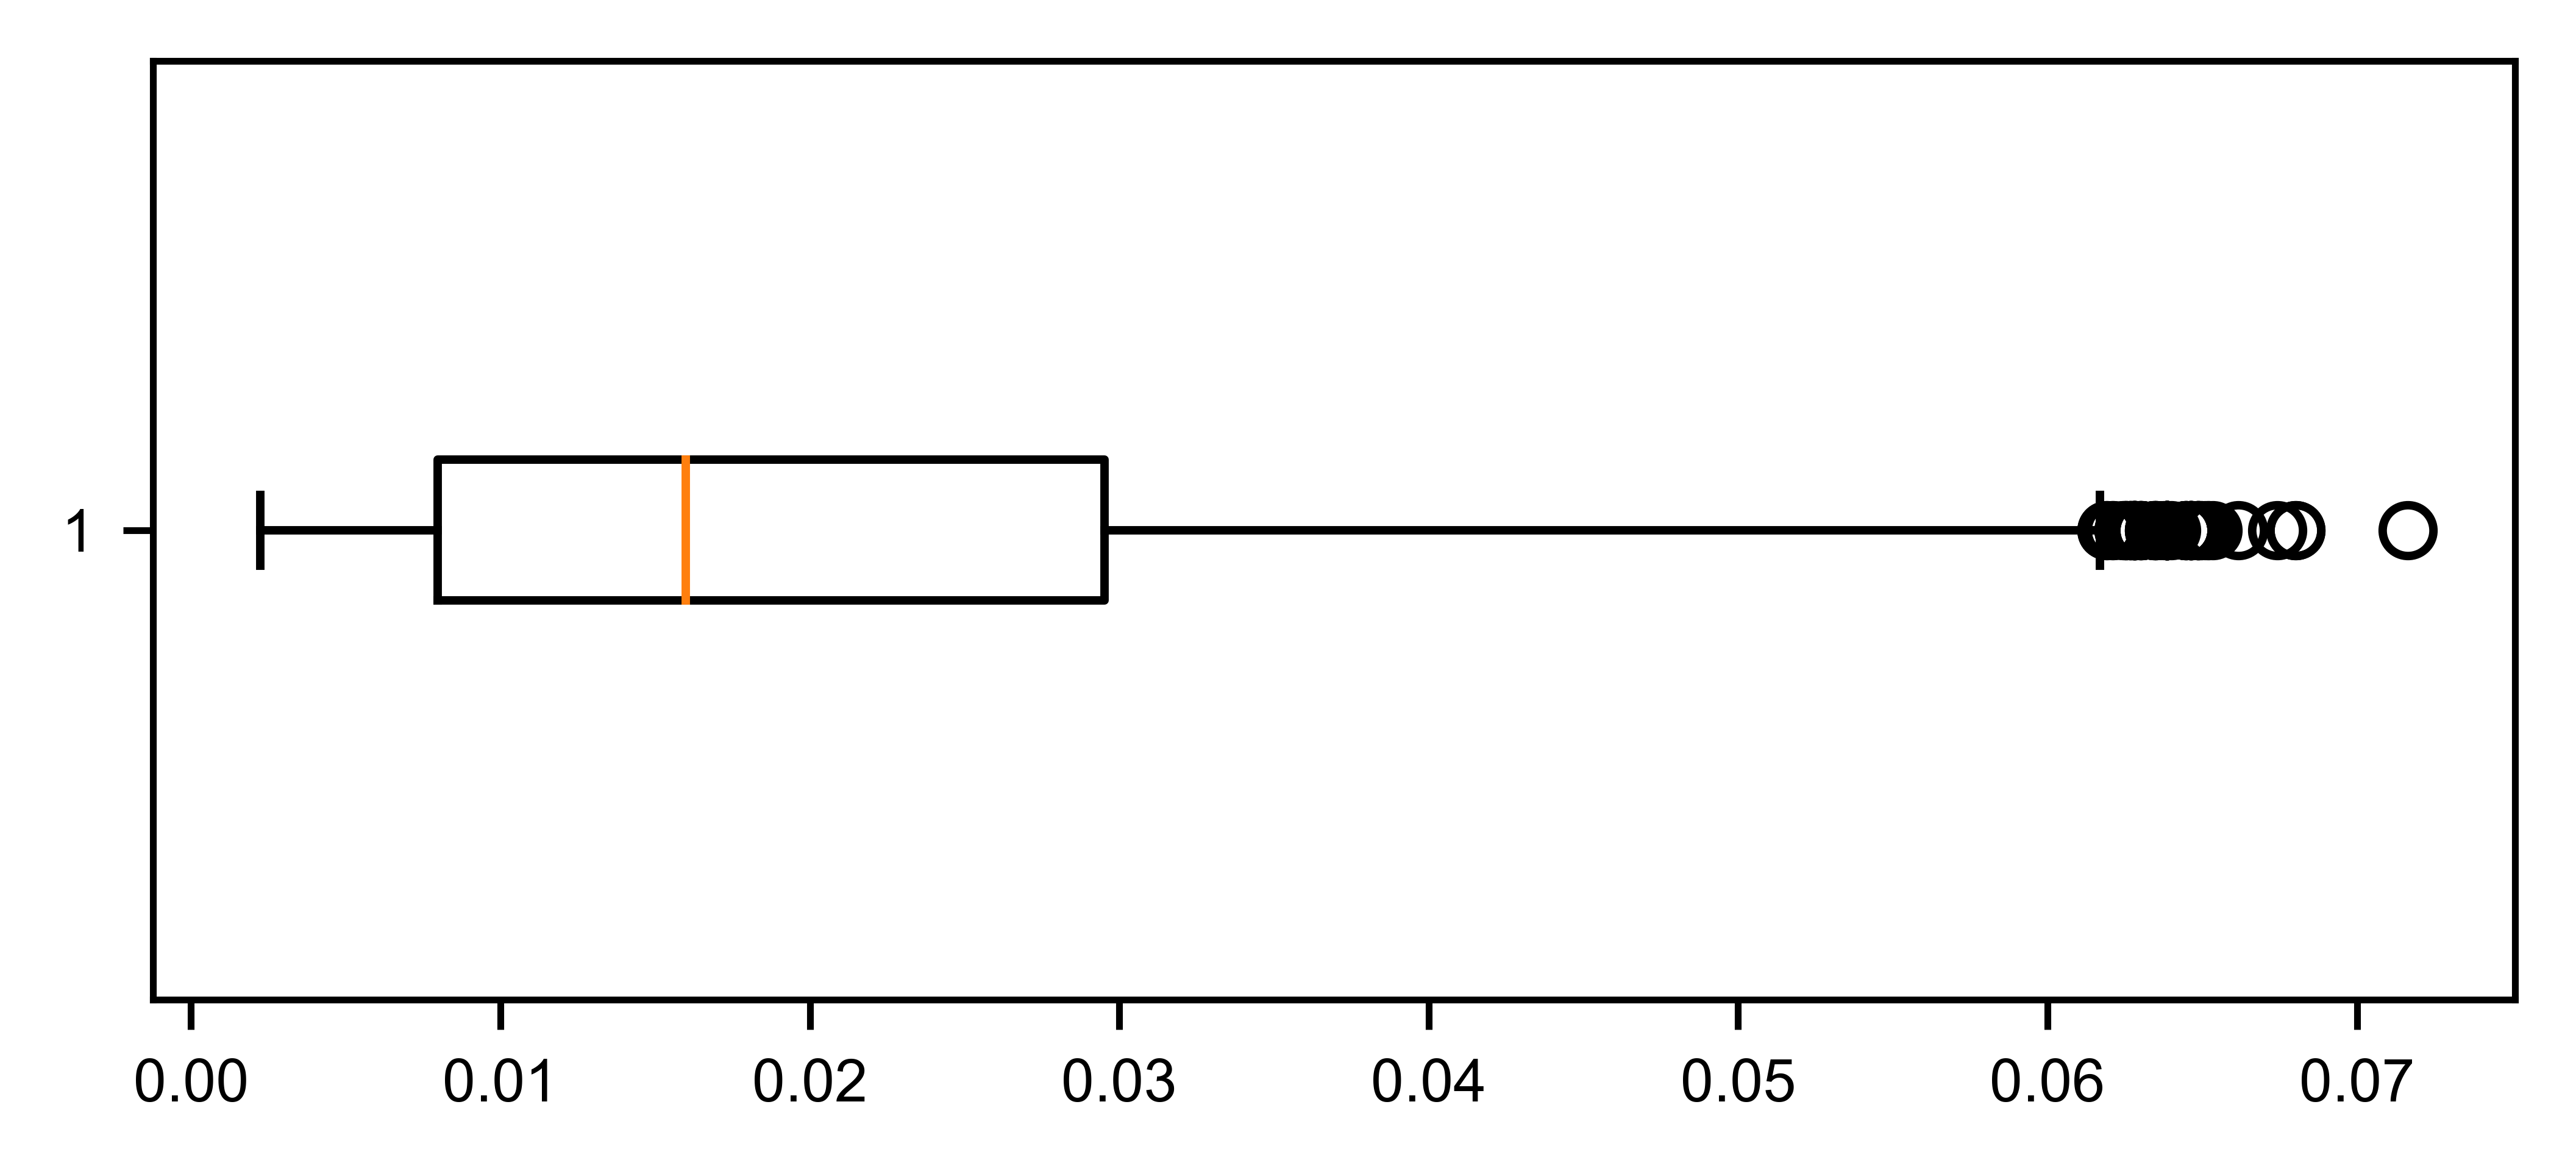

In [39]:
#Boxplot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 2), dpi=1000)
plt.rc('font', family='Arial', size=7)
plt.boxplot(d["elevar"], vert=False)
plt.savefig("elevar_NRW_boxplot.svg", format='svg')
plt.show()

In [16]:
#turn categorical into dummy variables

#create dummy for Raumtyp
dummies_Raumtyp = pd.get_dummies(d['Raumtyp'], prefix='Raumtyp')
dummies_Raumtyp = dummies_Raumtyp.rename(columns=lambda x: x.replace('Raumtyp', ''))
dummies_Raumtyp.columns = ['Raumtyp' + str(col) for col in dummies_Raumtyp.columns]
d = d.join(dummies_Raumtyp)

#create binary dummy variables for age, education, gender, occupation, hh economic status, hh size
dummies_alter_gr = pd.get_dummies(d['alter_gr'], prefix='alter_gr')
dummies_alter_gr = dummies_alter_gr.rename(columns=lambda x: x.replace('alter_gr_', ''))
dummies_alter_gr.columns = ['alter_gr_' + str(col) for col in dummies_alter_gr.columns]
d = d.join(dummies_alter_gr)

dummies_P_BIL = pd.get_dummies(d['P_BIL'], prefix='P_BIL')
dummies_P_BIL = dummies_P_BIL.rename(columns=lambda x: x.replace('P_BIL_', ''))
dummies_P_BIL.columns = ['P_BIL_' + str(col) for col in dummies_P_BIL.columns]
d = d.join(dummies_P_BIL)

dummies_HP_SEX = pd.get_dummies(d['HP_SEX'], prefix='HP_SEX')
dummies_HP_SEX = dummies_HP_SEX.rename(columns=lambda x: x.replace('HP_SEX_', ''))
dummies_HP_SEX.columns = ['HP_SEX_' + str(col) for col in dummies_HP_SEX.columns]
d = d.join(dummies_HP_SEX)

dummies_taet = pd.get_dummies(d['taet'], prefix='taet')
dummies_taet = dummies_taet.rename(columns=lambda x: x.replace('taet_', ''))
dummies_taet.columns = ['taet_' + str(col) for col in dummies_taet.columns]
d = d.join(dummies_taet)

dummies_oek_status = pd.get_dummies(d['oek_status'], prefix='oek_status')
dummies_oek_status = dummies_oek_status.rename(columns=lambda x: x.replace('oek_status_', ''))
dummies_oek_status.columns = ['oek_status_' + str(col) for col in dummies_oek_status.columns]
d = d.join(dummies_oek_status)

dummies_hhgr_gr2 = pd.get_dummies(d['hhgr_gr2'], prefix='hhgr_gr2')
dummies_hhgr_gr2 = dummies_hhgr_gr2.rename(columns=lambda x: x.replace('hhgr_gr2_', ''))
dummies_hhgr_gr2.columns = ['hhgr_gr2_' + str(col) for col in dummies_hhgr_gr2.columns]
d = d.join(dummies_hhgr_gr2)

# drop the original categorical variables
d = d.drop('Raumtyp', axis=1)
d = d.drop('HP_SEX', axis=1)
d = d.drop('alter_gr', axis=1)
d = d.drop('taet', axis=1)
d = d.drop('P_BIL', axis=1)
d = d.drop('hhgr_gr2', axis=1)
d = d.drop('oek_status', axis=1)

pd.set_option('display.max_columns', None)
d

,H_ID_Lok,P_ID,P_GEW,P_HOCH,vpedrad,GITTER_500m,GITTER_1km,GITTER_5km,PRAEZISION,elevar,Raumtyp_11,Raumtyp_12,Raumtyp_21,Raumtyp_22,alter_gr_1,alter_gr_2,alter_gr_3,alter_gr_4,alter_gr_5,alter_gr_6,alter_gr_7,alter_gr_8,P_BIL_1,P_BIL_2,P_BIL_3,P_BIL_4,P_BIL_5,P_BIL_6,HP_SEX_1,HP_SEX_2,taet_1,taet_2,taet_3,taet_4,taet_5,oek_status_1,oek_status_2,oek_status_3,oek_status_4,oek_status_5,hhgr_gr2_1,hhgr_gr2_2,hhgr_gr2_3,hhgr_gr2_4
8,10002550,1,",781016122726076","202,871194932508",1,500mN30810E40450,1kmN3081E4045,5kmN3080E4045,1,0.026270,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
16,10003680,1,",186112318433314","48,3432125580693",3,500mN30690E41195,1kmN3069E4119,5kmN3065E4115,1,0.017991,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
28,10005060,1,",0995876487234696","25,8681795537466",1,,1kmN3084E4111,5kmN3080E4110,1,0.007031,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0
29,10005060,2,",147471578855225","38,3061687849895",1,,1kmN3084E4111,5kmN3080E4110,1,0.007031,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
36,10007010,1,",245834573624995","63,8562409351415",1,500mN30620E41125,1kmN3062E4112,5kmN3060E4110,1,0.012211,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316307,99984820,1,",909739798542854","236,307541723794",2,500mN31210E42025,1kmN3121E4202,5kmN3120E4200,1,0.050316,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
316308,99984820,2,",589583568286475","153,146035696884",2,500mN31210E42025,1kmN3121E4202,5kmN3120E4200,1,0.050316,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
316322,99991670,1,",132814859249385","34,4990435109951",1,500mN30820E41015,1kmN3082E4101,5kmN3080E4100,3,0.020933,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
316323,99991670,2,",262320000067251","68,1383780946653",1,500mN30820E41015,1kmN3082E4101,5kmN3080E4100,3,0.020933,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


In [17]:
# turn vpedrad into binary dichotomous choice variable
d['cbike'] = d['vpedrad'].apply(lambda x: 1 if x in [1, 3] else 0)
d['ebike'] = d['vpedrad'].apply(lambda x: 1 if x in [2, 3] else 0)
d

,H_ID_Lok,P_ID,P_GEW,P_HOCH,vpedrad,GITTER_500m,GITTER_1km,GITTER_5km,PRAEZISION,elevar,Raumtyp_11,Raumtyp_12,Raumtyp_21,Raumtyp_22,alter_gr_1,alter_gr_2,alter_gr_3,alter_gr_4,alter_gr_5,alter_gr_6,alter_gr_7,alter_gr_8,P_BIL_1,P_BIL_2,P_BIL_3,P_BIL_4,P_BIL_5,P_BIL_6,HP_SEX_1,HP_SEX_2,taet_1,taet_2,taet_3,taet_4,taet_5,oek_status_1,oek_status_2,oek_status_3,oek_status_4,oek_status_5,hhgr_gr2_1,hhgr_gr2_2,hhgr_gr2_3,hhgr_gr2_4,cbike,ebike
8,10002550,1,",781016122726076","202,871194932508",1,500mN30810E40450,1kmN3081E4045,5kmN3080E4045,1,0.026270,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
16,10003680,1,",186112318433314","48,3432125580693",3,500mN30690E41195,1kmN3069E4119,5kmN3065E4115,1,0.017991,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1
28,10005060,1,",0995876487234696","25,8681795537466",1,,1kmN3084E4111,5kmN3080E4110,1,0.007031,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
29,10005060,2,",147471578855225","38,3061687849895",1,,1kmN3084E4111,5kmN3080E4110,1,0.007031,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
36,10007010,1,",245834573624995","63,8562409351415",1,500mN30620E41125,1kmN3062E4112,5kmN3060E4110,1,0.012211,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316307,99984820,1,",909739798542854","236,307541723794",2,500mN31210E42025,1kmN3121E4202,5kmN3120E4200,1,0.050316,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
316308,99984820,2,",589583568286475","153,146035696884",2,500mN31210E42025,1kmN3121E4202,5kmN3120E4200,1,0.050316,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
316322,99991670,1,",132814859249385","34,4990435109951",1,500mN30820E41015,1kmN3082E4101,5kmN3080E4100,3,0.020933,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
316323,99991670,2,",262320000067251","68,1383780946653",1,500mN30820E41015,1kmN3082E4101,5kmN3080E4100,3,0.020933,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


In [10]:
# save d
d.to_csv('D:/Processed Data/NRW_ownership_input.csv')